# **Crop Yield**

Problem Statement:
In this project we have to the prediction of top 10 most consumed yields all over the world is established by 
applying machine learning techniques. It consists of 10 most consumed crops. 

These corps include :

• Cassava

• Maize

• Plantains and others

• Potatoes

• Rice, paddy

• Sorghum

• Soybeans

• Sweet potatoes

• Wheat

• Yams

In [ ]:
#importing the packages  
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [ ]:
#import the dataset
data = pd.read_csv('/content/pesticides.csv')
data1 = pd.read_csv('/content/rainfall.csv')
data2 = pd.read_csv('/content/temp.csv')
data3 = pd.read_csv('/content/yield.csv')

In [ ]:
data.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
data = data.rename(index=str, columns={"Value": "pesticide"})
data = data.drop(['Element','Domain','Unit','Item'], axis=1)
data.head()

,Area,Year,pesticide
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       4349 non-null   object 
 1   Year       4349 non-null   int64  
 2   pesticide  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [ ]:
data1.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [ ]:
data1['average_rain_fall_mm_per_year'] = pd.to_numeric(data1['average_rain_fall_mm_per_year'],errors = 'coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [ ]:
data1=data1.dropna()

In [ ]:
data2.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
data2.tail()

,year,country,avg_temp
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52
71310,2013,Mexico,22.19


In [ ]:
data3.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
data3.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [ ]:
corr_matrix = data3.corr()
print(corr_matrix)

              Area Code  Element Code  Item Code  Year Code      Year  \
Area Code      1.000000           NaN  -0.018246   0.023029  0.023029   
Element Code        NaN           NaN        NaN        NaN       NaN   
Item Code     -0.018246           NaN   1.000000   0.011119  0.011119   
Year Code      0.023029           NaN   0.011119   1.000000  1.000000   
Year           0.023029           NaN   0.011119   1.000000  1.000000   
Value         -0.006211           NaN   0.180969   0.136153  0.136153   

                 Value  
Area Code    -0.006211  
Element Code       NaN  
Item Code     0.180969  
Year Code     0.136153  
Year          0.136153  
Value         1.000000  


In [ ]:
data3= data3.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)

In [ ]:
data2.rename(columns={'year': 'Year'}, inplace=True)
data2.rename(columns={'year': 'Year'}, inplace=True)
data1.rename(columns={' Area':'Area'},inplace=True)
data2.rename(columns={'country':'Area'},inplace=True)
data3.rename(columns={'Value':'Yield'},inplace=True)

In [ ]:
data3.describe()

,Year,Yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [ ]:
total_yield= pd.merge(data1, data3, on=['Year','Area'])

In [ ]:
total_yield.shape

(25385, 5)

In [ ]:
total_yield.head()

,Area,Year,average_rain_fall_mm_per_year,Item,Yield
0,Afghanistan,1985,327.0,Maize,16652
1,Afghanistan,1985,327.0,Potatoes,140909
2,Afghanistan,1985,327.0,"Rice, paddy",22482
3,Afghanistan,1985,327.0,Wheat,12277
4,Afghanistan,1986,327.0,Maize,16875


In [ ]:
total_yield= pd.merge(total_yield, data, on=['Year','Area'])
total_yield.shape

(18949, 6)

In [ ]:
total_yield.head()

,Area,Year,average_rain_fall_mm_per_year,Item,Yield,pesticide
0,Albania,1990,1485.0,Maize,36613,121.0
1,Albania,1990,1485.0,Potatoes,66667,121.0
2,Albania,1990,1485.0,"Rice, paddy",23333,121.0
3,Albania,1990,1485.0,Sorghum,12500,121.0
4,Albania,1990,1485.0,Soybeans,7000,121.0


In [ ]:
total_yield= pd.merge(total_yield, data2, on=['Year','Area'])
total_yield.shape

(28242, 7)

## After merging the all four datasets

In [ ]:
total_yield.head()

,Area,Year,average_rain_fall_mm_per_year,Item,Yield,pesticide,avg_temp
0,Albania,1990,1485.0,Maize,36613,121.0,16.37
1,Albania,1990,1485.0,Potatoes,66667,121.0,16.37
2,Albania,1990,1485.0,"Rice, paddy",23333,121.0,16.37
3,Albania,1990,1485.0,Sorghum,12500,121.0,16.37
4,Albania,1990,1485.0,Soybeans,7000,121.0,16.37


In [ ]:
total_yield.isnull().sum()

Area                             0
Year                             0
average_rain_fall_mm_per_year    0
Item                             0
Yield                            0
pesticide                        0
avg_temp                         0
dtype: int64

In [ ]:
total_yield.describe()

,Year,average_rain_fall_mm_per_year,Yield,pesticide,avg_temp
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,77053.332094,37076.909344,20.542627
std,7.051905,709.81215,84956.612897,59958.784665,6.312051
min,1990.000000,51.00000,50.000000,0.040000,1.300000
25%,1995.000000,593.00000,19919.250000,1702.000000,16.702500
50%,2001.000000,1083.00000,38295.000000,17529.440000,21.510000
75%,2008.000000,1668.00000,104676.750000,48687.880000,26.000000
max,2013.000000,3240.00000,501412.000000,367778.000000,30.650000


In [ ]:
total_yield.groupby('Item').count()

,Area,Year,average_rain_fall_mm_per_year,Yield,pesticide,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
total_yield.groupby(['Item','Area'],sort=True)['Yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: Yield, dtype: int64

In [ ]:
corr =total_yield.corr()

<AxesSubplot:>

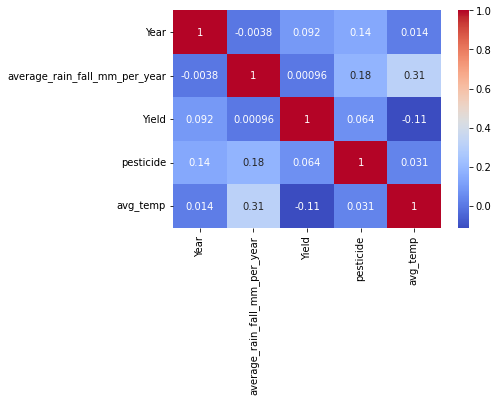

In [ ]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

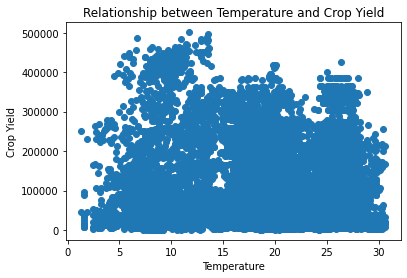

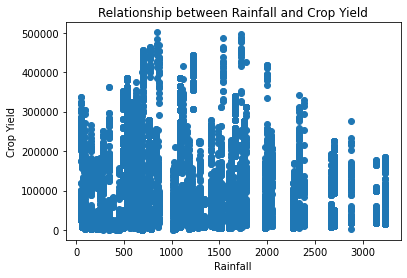

In [ ]:
plt.scatter(total_yield['avg_temp'], total_yield['Yield'])

# set the labels and title
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')
plt.title('Relationship between Temperature and Crop Yield')

# show the plot
plt.show()


plt.scatter(total_yield['average_rain_fall_mm_per_year'], total_yield['Yield'])

# set the labels and title
plt.xlabel('Rainfall')
plt.ylabel('Crop Yield')
plt.title('Relationship between Rainfall and Crop Yield')

# show the plot
plt.show()

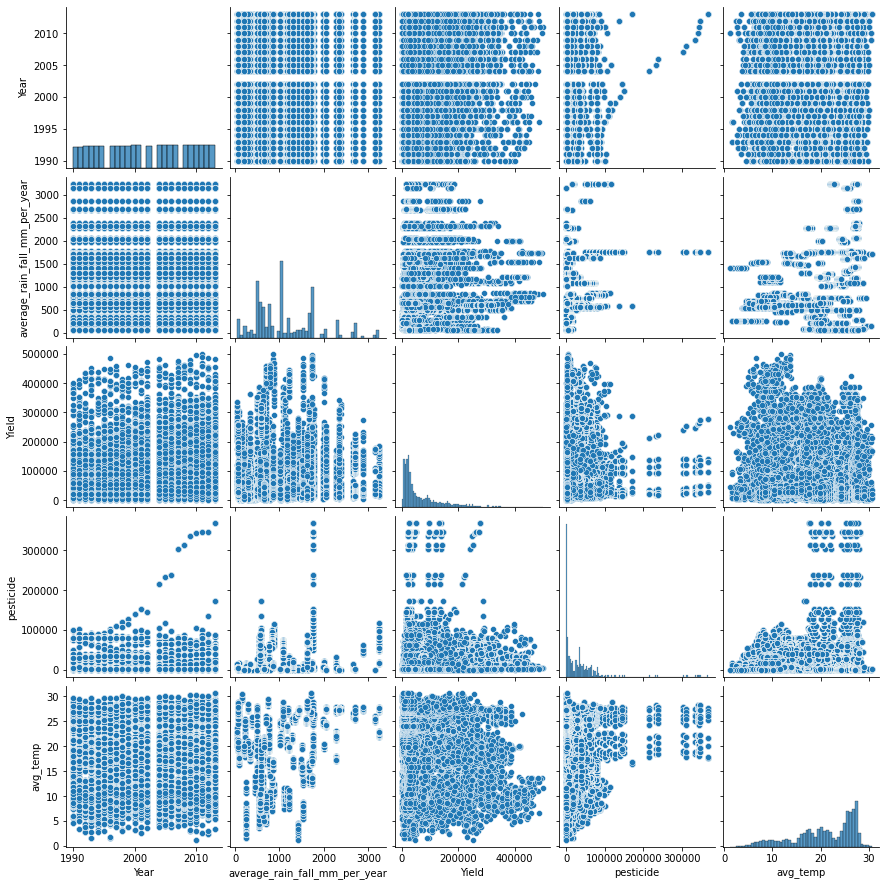

In [ ]:
sns.pairplot(total_yield)

# show the plot
plt.show()

In [ ]:
total_yield.head()

,Area,Year,average_rain_fall_mm_per_year,Item,Yield,pesticide,avg_temp
0,Albania,1990,1485.0,Maize,36613,121.0,16.37
1,Albania,1990,1485.0,Potatoes,66667,121.0,16.37
2,Albania,1990,1485.0,"Rice, paddy",23333,121.0,16.37
3,Albania,1990,1485.0,Sorghum,12500,121.0,16.37
4,Albania,1990,1485.0,Soybeans,7000,121.0,16.37


In [ ]:
mapping = {}
for i, category in enumerate(total_yield['Area'].unique()):
    mapping[category] = i

total_yield['Area'] = total_yield['Area'].map(mapping)


mapping = {}
for i, category in enumerate(total_yield['Item'].unique()):
    mapping[category] = i

total_yield['Item'] = total_yield['Item'].map(mapping)

In [ ]:
total_yield.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  int64  
 1   Year                           28242 non-null  int64  
 2   average_rain_fall_mm_per_year  28242 non-null  float64
 3   Item                           28242 non-null  int64  
 4   Yield                          28242 non-null  int64  
 5   pesticide                      28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.7 MB


In [ ]:
train_size = int(0.8 * len(total_yield))
train_X = total_yield.iloc[:train_size, :-1].values
train_y = total_yield.iloc[:train_size, -1].values
test_X = total_yield.iloc[train_size:, :-1].values
test_y = total_yield.iloc[train_size:, -1].values

print(f"Train size: {len(train_X)}")
print(f"Test size: {len(test_X)}")
print(f"Train size: {len(train_y)}")
print(f"Test size: {len(test_y)}")


Train size: 22593
Test size: 5649
Train size: 22593
Test size: 5649


In [ ]:
import numpy as np

class StandardScaler:
    def _init_(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
#standard scalar 
sc = StandardScaler()
sc.fit(train_X)
X_train = sc.transform(train_X)
X_test = sc.transform(test_X) 
sc.fit(train_y)
y_train = sc.transform(train_y)
y_test = sc.transform(test_y)


In [ ]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

In [ ]:
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.randn(1000, 5)
y = X[:, 0] + 2 * X[:, 1] + np.random.randn(1000)

In [ ]:
# Split the data into training and test sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

In [ ]:
# Fit the model
model = Lasso_Regression(learning_rate = 0.01, no_of_iterations=1000,
                         lambda_parameter=10)
model.fit(X_train, y_train)

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:

# Evaluate the model on the test set
y_pred = model.predict(X_test)
error = np.mean((y_test - y_pred) ** 2)
print("Test MSE:", error)

Test MSE: 1.0951375516351871


In [ ]:
total_sum_squares = np.sum((y_test - np.mean (y_test))**2)
residual_sum_squares = np.sum((y_test - y_pred)**2)
r_squared = 1 - (residual_sum_squares / total_sum_squares)

In [ ]:
# Print results
print ("Mean Squared Error:" , error)
print ("R-squared score:",r_squared)

Mean Squared Error: 1.0951375516351871
R-squared score: 0.804742147289063
